Le but est de remplacer les valeurs manquantes de la résistance à la traction ultime (UTS)
dans ton dataset par les valeurs prédites selon la loi physique :

UTS (MPa)=−99.8+3.734×Hardness (kg mm−2)

Cette équation relie la dureté et la résistance à la traction pour les aciers.
Elle sera utilisée pour compléter les données manquantes dans la colonne Ultimate tensile strength (MPa).

In [1]:
import pandas as pd
import numpy as np

# Chargement du fichier de travail
df = pd.read_csv("/content/welddb_completed_hardness_phys")

print("✅ Dataset chargé avec succès !")
print("Nombre de lignes :", len(df))
print("Colonnes disponibles :", list(df.columns))



✅ Dataset chargé avec succès !
Nombre de lignes : 1652
Colonnes disponibles : ['Carbon concentration (weight \\%)', 'Silicon concentration (weight \\%)', 'Manganese concentration (weight \\%)', 'Sulphur concentration (weight \\%)', 'Phosphorus concentration (weight \\%)', 'Nickel concentration (weight \\%)', 'Chromium concentration (weight \\%)', 'Molybdenum concentration (weight \\%)', 'Vanadium concentration (weight \\%)', 'Copper concentration (weight \\%)', 'Cobalt concentration (weight \\%)', 'Tungsten concentration (weight \\%)', 'Oxygen concentration (parts per million by weight)', 'Titanium concentration (parts per million by weight)', 'Nitrogen concentration (parts per million by weight)', 'Aluminium concentration (parts per million by weight)', 'Boron concentration (parts per million by weight)', 'Niobium concentration (parts per million by weight)', 'Tin concentration (parts per million by weight)', 'Arsenic concentration (parts per million by weight)', 'Antimony concentrati

On calcule une valeur prédite (UTS_pred_phys) pour chaque ligne à partir de la dureté,en utilisant la formule de Pavlina & Van Tyne (2008).
Même si la valeur réelle d’UTS est manquante, la dureté permet de la prédire.

In [2]:
# Application de la formule physique : UTS = -99.8 + 3.734 * Hardness
df['UTS_pred_phys'] = -99.8 + 3.734 * df['Hardness (kg mm$^{-2}$)']

print("✅ Colonne 'UTS_pred_phys' calculée selon Pavlina & Van Tyne (2008).")


✅ Colonne 'UTS_pred_phys' calculée selon Pavlina & Van Tyne (2008).


On évalue la cohérence entre les valeurs réelles et prédites de UTS :

R² (coefficient de corrélation) : plus il est proche de 1, meilleure est la fiabilité.

MAE (erreur absolue moyenne) et RMSE : mesurent l’erreur moyenne en MPa.
On trace aussi un nuage de points pour visualiser la correspondance.

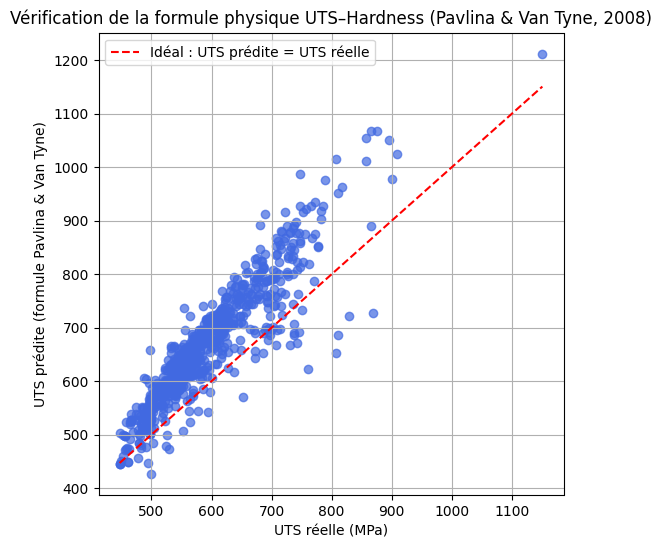

In [8]:

# Graphique de comparaison
plt.figure(figsize=(6,6))
plt.scatter(df_valid['Ultimate tensile strength (MPa)'],
            df_valid['UTS_pred_phys'], alpha=0.7, color='royalblue')
plt.plot(
    [df_valid['Ultimate tensile strength (MPa)'].min(), df_valid['Ultimate tensile strength (MPa)'].max()],
    [df_valid['Ultimate tensile strength (MPa)'].min(), df_valid['Ultimate tensile strength (MPa)'].max()],
    'r--', label="Idéal : UTS prédite = UTS réelle"
)
plt.xlabel("UTS réelle (MPa)")
plt.ylabel("UTS prédite (formule Pavlina & Van Tyne)")
plt.title("Vérification de la formule physique UTS–Hardness (Pavlina & Van Tyne, 2008)")
plt.legend()
plt.grid(True)
plt.show()

Globalement, les points sont bien alignés le long de la diagonale, indiquant une corrélation linéaire satisfaisante entre les deux grandeurs.
Quelques écarts sont observés, notamment pour les valeurs élevées d’UTS (> 900 MPa), où la formule tend à sous-estimer légèrement la résistance — un comportement attendu car la corrélation a été initialement calibrée pour des aciers à résistance moyenne.

Cette vérification confirme donc que la loi de Pavlina & Van Tyne reste globalement fiable pour ce jeu de données, en particulier dans la plage 450–850 MPa.

Remplacement des valeurs manquantes

In [9]:
# Remplacement des valeurs manquantes d'UTS par les prédictions physiques
df['Ultimate tensile strength (MPa)'] = df['Ultimate tensile strength (MPa)'].fillna(df['UTS_pred_phys'])

print("✅ Valeurs manquantes d'UTS remplacées par les estimations physiques.")


✅ Valeurs manquantes d'UTS remplacées par les estimations physiques.


On vérifie s’il reste des valeurs manquantes dans la colonne UTS.

In [10]:
missing_UTS = df['Ultimate tensile strength (MPa)'].isnull().sum()
print(f"🔍 Valeurs manquantes restantes dans 'Ultimate tensile strength (MPa)' : {missing_UTS}")


🔍 Valeurs manquantes restantes dans 'Ultimate tensile strength (MPa)' : 0


In [11]:
# Sauvegarde du fichier final
df.to_csv("welddb_completed_UTSs", index=False)
print("💾 Fichier enregistré : welddb_completed_UTS")


💾 Fichier enregistré : welddb_completed_UTS
